<a href="https://colab.research.google.com/github/asvskartheek/CS-F320/blob/master/Ckpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science shortcuts/query_result_080424.csv')
df.head()

,body,message_id,thread_id,sender_id,channel_name,channel_type,channel_id,timestamp,sender_details,reactions
0,Hi :) Thanks for installing Zivy\nYou can star...,1.706262e+09,1.706262e+09,U06FBHDHRDW,NaN,dm,D06EQKL90EB,1706261694971,"{""id"":""U06FBHDHRDW"",""team_id"":""T05VB0Z683Y"",""n...",[]
1,test message <@U060HD8P562>,1.706262e+09,1.706262e+09,U0603KVDV6W,engineering,public_channel,C06G0G5BRUY,1706261826273,"{""id"":""U0603KVDV6W"",""team_id"":""T05VB0Z683Y"",""n...",[]
2,Getting this in prod,1.706259e+09,1.706259e+09,U060HD8P562,engineering,public_channel,C06G0G5BRUY,1706258872023,"{""id"":""U060HD8P562"",""team_id"":""T05VB0Z683Y"",""n...",[]
3,<https://web.zivy.app/summary/NQAjwn3Fw0latI>,1.706259e+09,1.706259e+09,U060HD8P562,engineering,public_channel,C06G0G5BRUY,1706258898851,"{""id"":""U060HD8P562"",""team_id"":""T05VB0Z683Y"",""n...",[]
4,checking,1.706259e+09,1.706259e+09,U060DUJH4VA,engineering,public_channel,C06G0G5BRUY,1706259199606,"{""id"":""U060DUJH4VA"",""team_id"":""T05VB0Z683Y"",""n...",[]


# Pre-process the dataset in the format we want

columns:
- body(str)
- previous_messages in this thread: List[str]
- next_message in this thread: str
- channel_name: str
- sender_details
- reactions


Final output length: 12,248

## Only public channels

We will be choosing only public channels for privacy reasons.

In [ ]:
sub_df = df[df['channel_type'] == 'public_channel']
len(sub_df)

22240

In [ ]:
sub_df.isna().sum()

body              5597
message_id           0
thread_id            0
sender_id            0
channel_name         0
channel_type         0
channel_id           0
timestamp            0
sender_details       0
reactions            0
dtype: int64

## Remove NA messages from body

In [ ]:
sub_df = sub_df.dropna(subset=['body'])
sub_df.head()

,body,message_id,thread_id,sender_id,channel_name,channel_type,channel_id,timestamp,sender_details,reactions
1,test message <@U060HD8P562>,1.706262e+09,1.706262e+09,U0603KVDV6W,engineering,public_channel,C06G0G5BRUY,1706261826273,"{""id"":""U0603KVDV6W"",""team_id"":""T05VB0Z683Y"",""n...",[]
2,Getting this in prod,1.706259e+09,1.706259e+09,U060HD8P562,engineering,public_channel,C06G0G5BRUY,1706258872023,"{""id"":""U060HD8P562"",""team_id"":""T05VB0Z683Y"",""n...",[]
3,<https://web.zivy.app/summary/NQAjwn3Fw0latI>,1.706259e+09,1.706259e+09,U060HD8P562,engineering,public_channel,C06G0G5BRUY,1706258898851,"{""id"":""U060HD8P562"",""team_id"":""T05VB0Z683Y"",""n...",[]
4,checking,1.706259e+09,1.706259e+09,U060DUJH4VA,engineering,public_channel,C06G0G5BRUY,1706259199606,"{""id"":""U060DUJH4VA"",""team_id"":""T05VB0Z683Y"",""n...",[]
5,don't check,1.706259e+09,1.706259e+09,U0603KVDV6W,engineering,public_channel,C06G0G5BRUY,1706259402408,"{""id"":""U0603KVDV6W"",""team_id"":""T05VB0Z683Y"",""n...",[]


In [ ]:
len(sub_df)

16643

## selecting a few channels

Removing script-testing and script-testing2 as they do not represent real data.

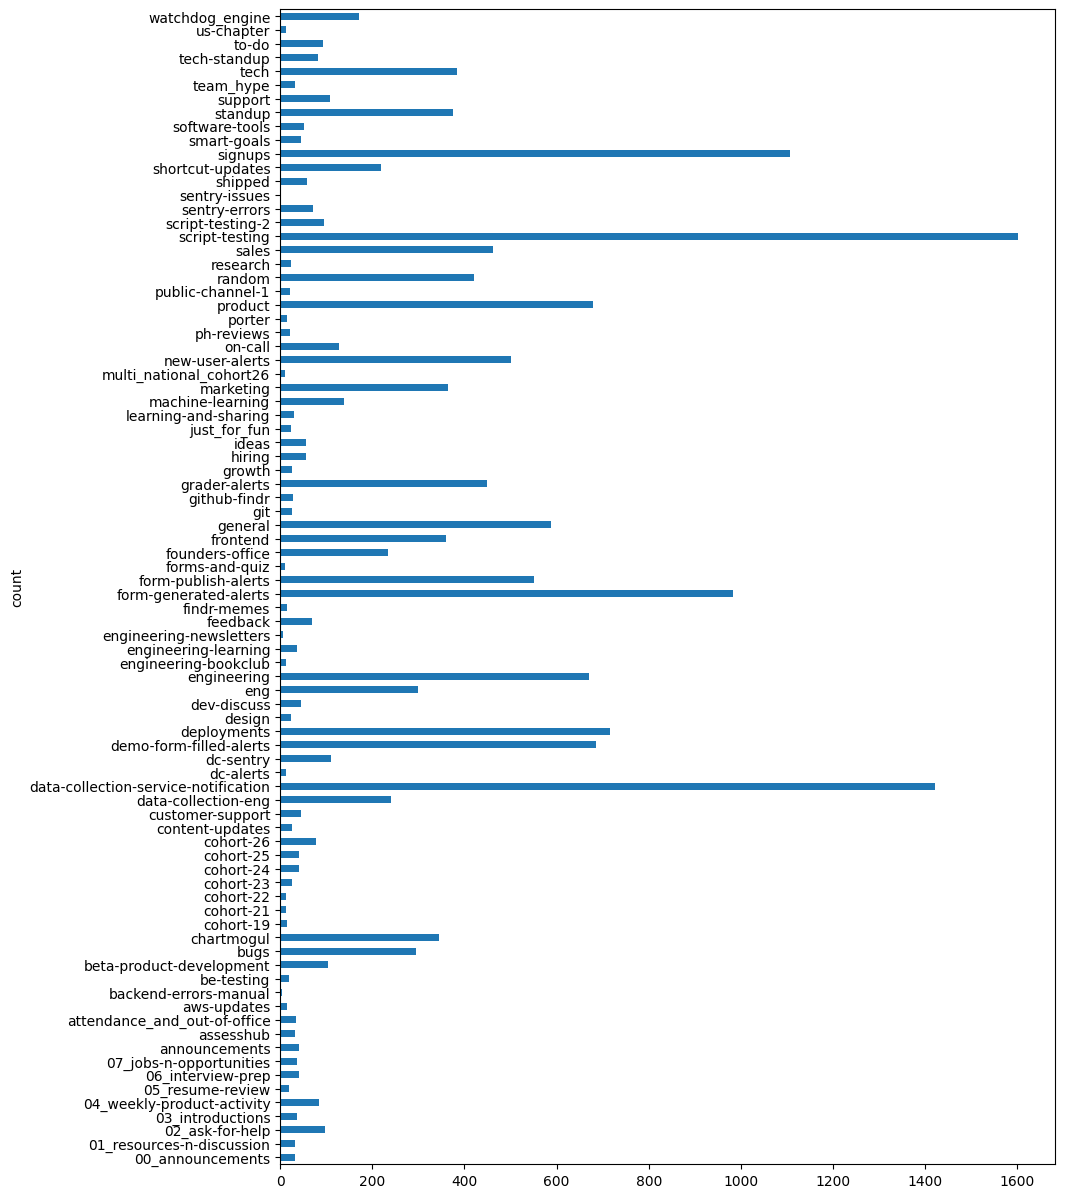

In [ ]:
plt.rcParams["figure.figsize"] = (10,15)
sub_df['channel_name'].value_counts().sort_index().plot(kind='barh', rot=0, ylabel='count')
plt.show()

In [ ]:
sub_df = sub_df[sub_df['channel_name'] != 'script-testing']
sub_df = sub_df[sub_df['channel_name'] != 'script-testing-2']
len(sub_df)

14946

## Creating sender_designation column

In [ ]:
# TODO: Find the keys in which designation data would be at.

## Creating previous messages column from the thread.

In [ ]:
k = 5
for i, row in sub_df.iterrows():
    if row['thread_id'] == row['message_id']:
        past_messages = sub_df.loc[
            (sub_df['channel_id'] == row['channel_id'])
            & (sub_df['timestamp'] < row['timestamp'])
            ].nlargest(k, 'timestamp')[['body', 'timestamp']]
    else:
        past_messages = sub_df.loc[
            (sub_df['thread_id'] == row['thread_id'])
            & (sub_df['timestamp'] < row['timestamp'])
            ].nlargest(k, 'timestamp')[['body', 'timestamp']]
    print(past_messages[::-1])
    if i==10:
        break

                                                body      timestamp
3      <https://web.zivy.app/summary/NQAjwn3Fw0latI>  1706258898851
4                                           checking  1706259199606
5                                        don't check  1706259402408
6  the latest BE is still not there on prod, the ...  1706259461554
7                               oh okay:sweat_smile:  1706259492458
                                                   body      timestamp
1350  and <mailto:Koustubh@aimonk.com|Koustubh@aimon...  1706207708784
1351  also <mailto:koushik@supademo.com|koushik@supa...  1706207754098
1352                                                yes  1706209100757
1353  lmk when the whitelisting is done. Might have ...  1706250577733
1354  Koushik and Bhavishya are scheduled for Saturd...  1706251027056
                   body      timestamp
2  Getting this in prod  1706258872023
                                            body      timestamp
2                       

In [ ]:
from datetime import datetime, timezone, timedelta

def epoch_to_timezone_formatted(epoch_timestamp, tz_offset_hours=5, tz_offset_minutes=30):
    # Convert epoch timestamp to datetime object
    dt = datetime.fromtimestamp(epoch_timestamp / 1000.0)

    # Calculate the timezone offset in hours and minutes
    tz_offset = timedelta(hours=tz_offset_hours, minutes=tz_offset_minutes)

    # Adjust datetime object to the specified timezone
    dt += tz_offset

    # Format datetime object as 'Sat 02:43AM'
    formatted_time = dt.strftime('%a %I:%M%p').lstrip('0').replace(' 0', ' ')

    return formatted_time

In [ ]:
x = []
for i, row in past_messages.iterrows():
    x.append(
        f"{epoch_to_timezone_formatted(row['timestamp'])} -- {row['body']}"
    )
    print(x[0])
    break

Thu 9:25PM -- the error message seems grammatically incorrect "We have logged the error on will be working to fix it ASAP!".


In [ ]:
sub_df.sort_values(['thread_id', 'timestamp'], inplace=True)

def get_previous_messages(row, k=3):
    # For message_id = thread_id, get k recent messages in the same channel_id.
    # Else get 3 recent messages in the same thread_id
    if row['thread_id'] == row['message_id']:
        past_messages = sub_df.loc[
            (sub_df['channel_id'] == row['channel_id'])
            & (sub_df['timestamp'] < row['timestamp'])
            ].nlargest(k, 'timestamp')[['body', 'timestamp']]
    else:
        past_messages = sub_df.loc[
            (sub_df['thread_id'] == row['thread_id'])
            & (sub_df['timestamp'] < row['timestamp'])
            ].nlargest(k, 'timestamp')[['body', 'timestamp']]
    return [f"{epoch_to_timezone_formatted(row['timestamp'])} -- {row['body']}" for i, row in past_messages.iterrows()][::-1] # for proper ordering, 1st message - oldest.

sub_df['previous_messages'] = sub_df.apply(get_previous_messages, axis=1)

In [ ]:
sub_df.head()

,body,message_id,thread_id,sender_id,channel_name,channel_type,channel_id,timestamp,sender_details,reactions,previous_messages
25221,<@U05F33HB12N> has joined the channel,1.688160e+09,1.688160e+09,U05F33HB12N,random,public_channel,C04MJRTCDV2,1688159584324,"{""id"":""U05F33HB12N"",""team_id"":""T04MDDQNLUV"",""n...",[],[]
25220,<@U05FA7NGTAN> has joined the channel,1.688385e+09,1.688385e+09,U05FA7NGTAN,random,public_channel,C04MJRTCDV2,1688384616971,"{""id"":""U05FA7NGTAN"",""team_id"":""T04MDDQNLUV"",""n...",[],[Sat 2:43AM -- <@U05F33HB12N> has joined the c...
25219,<@U05FLJMLW9H> has joined the channel,1.688562e+09,1.688562e+09,U05FLJMLW9H,random,public_channel,C04MJRTCDV2,1688561785894,"{""id"":""U05FLJMLW9H"",""team_id"":""T04MDDQNLUV"",""n...",[],[Sat 2:43AM -- <@U05F33HB12N> has joined the c...
25218,<@U05G2H79TBN> has joined the channel,1.688771e+09,1.688771e+09,U05G2H79TBN,random,public_channel,C04MJRTCDV2,1688770847981,"{""id"":""U05G2H79TBN"",""team_id"":""T04MDDQNLUV"",""n...",[],[Sat 2:43AM -- <@U05F33HB12N> has joined the c...
13338,"yes, I’ve seen this — it’s awesome! it also ha...",1.689099e+09,1.689099e+09,U04AKFHKULS,research,public_channel,C04R6ULFDFX,1689098505326,"{""id"":""U04AKFHKULS"",""team_id"":""T04B96RB92L"",""n...",[],[]


In [ ]:
sub_df['previous_messages'].tolist()

[[],
 ['Sat 2:43AM -- <@U05F33HB12N> has joined the channel'],
 ['Sat 2:43AM -- <@U05F33HB12N> has joined the channel',
  'Mon 5:13PM -- <@U05FA7NGTAN> has joined the channel'],
 ['Sat 2:43AM -- <@U05F33HB12N> has joined the channel',
  'Mon 5:13PM -- <@U05FA7NGTAN> has joined the channel',
  'Wed 6:26PM -- <@U05FLJMLW9H> has joined the channel'],
 [],
 ['Tue 11:31PM -- yes, I’ve seen this — it’s awesome! it also has the second feature we’re looking for i.e. allowing only certain domains and certain individual email ids if they’re approved in the waitlists\n\nSince it supports both - user management at an org level^^ + implementing/managing a waitlist it’s safe to say we can go ahead with it :raised_hands:'],
 ['Tue 11:31PM -- yes, I’ve seen this — it’s awesome! it also has the second feature we’re looking for i.e. allowing only certain domains and certain individual email ids if they’re approved in the waitlists\n\nSince it supports both - user management at an org level^^ + implement

In [ ]:
x = 0
for i, row in sub_df.iterrows():
    if ','.join(list(row['previous_messages']))=='':
        x += 1
        print(f"Found {x}th empty previous_messages row, that is:\n {row}\n------\n")

    if i==10:
        break
print(x)

Found 1th empty previous_messages row, that is:
 body                             <@U05F33HB12N> has joined the channel
message_id                                           1688159584.324689
thread_id                                            1688159584.324689
sender_id                                                  U05F33HB12N
channel_name                                                    random
channel_type                                            public_channel
channel_id                                                 C04MJRTCDV2
timestamp                                                1688159584324
sender_details       {"id":"U05F33HB12N","team_id":"T04MDDQNLUV","n...
reactions                                                           []
previous_messages                                                   []
Name: 25221, dtype: object
------

Found 2th empty previous_messages row, that is:
 body                 yes, I’ve seen this — it’s awesome! it also ha...
message_id     

In [ ]:
def get_future_messages(row, k=1):
    # For message_id = thread_id, get k future messages in the same channel_id.
    # Else get k future messages in the same thread_id
    if row['thread_id'] == row['message_id']:
        future_messages = sub_df.loc[
            (sub_df['channel_id'] == row['channel_id'])
            & (sub_df['timestamp'] > row['timestamp'])
            ].nsmallest(k, 'timestamp')[['body', 'timestamp']]
    else:
        future_messages = sub_df.loc[
            (sub_df['thread_id'] == row['thread_id'])
            & (sub_df['timestamp'] > row['timestamp'])
            ].nsmallest(k, 'timestamp')[['body', 'timestamp']]
    return [f"{epoch_to_timezone_formatted(row['timestamp'])} -- {row['body']}" for i, row in future_messages.iterrows()]

sub_df['future_messages'] = sub_df.apply(get_future_messages, axis=1)

In [ ]:
sub_df.head()

,body,message_id,thread_id,sender_id,channel_name,channel_type,channel_id,timestamp,sender_details,reactions,previous_messages,future_messages
25221,<@U05F33HB12N> has joined the channel,1.688160e+09,1.688160e+09,U05F33HB12N,random,public_channel,C04MJRTCDV2,1688159584324,"{""id"":""U05F33HB12N"",""team_id"":""T04MDDQNLUV"",""n...",[],[],[Mon 5:13PM -- <@U05FA7NGTAN> has joined the c...
25220,<@U05FA7NGTAN> has joined the channel,1.688385e+09,1.688385e+09,U05FA7NGTAN,random,public_channel,C04MJRTCDV2,1688384616971,"{""id"":""U05FA7NGTAN"",""team_id"":""T04MDDQNLUV"",""n...",[],[Sat 2:43AM -- <@U05F33HB12N> has joined the c...,[Wed 6:26PM -- <@U05FLJMLW9H> has joined the c...
25219,<@U05FLJMLW9H> has joined the channel,1.688562e+09,1.688562e+09,U05FLJMLW9H,random,public_channel,C04MJRTCDV2,1688561785894,"{""id"":""U05FLJMLW9H"",""team_id"":""T04MDDQNLUV"",""n...",[],[Sat 2:43AM -- <@U05F33HB12N> has joined the c...,[Sat 4:30AM -- <@U05G2H79TBN> has joined the c...
25218,<@U05G2H79TBN> has joined the channel,1.688771e+09,1.688771e+09,U05G2H79TBN,random,public_channel,C04MJRTCDV2,1688770847981,"{""id"":""U05G2H79TBN"",""team_id"":""T04MDDQNLUV"",""n...",[],[Sat 2:43AM -- <@U05F33HB12N> has joined the c...,[Thu 4:38AM -- <@U05HXTCUFT6> has joined the c...
13338,"yes, I’ve seen this — it’s awesome! it also ha...",1.689099e+09,1.689099e+09,U04AKFHKULS,research,public_channel,C04R6ULFDFX,1689098505326,"{""id"":""U04AKFHKULS"",""team_id"":""T04B96RB92L"",""n...",[],[],[Tue 11:34PM -- + with a webhook auth sessions...


In [ ]:
sub_df['future_messages'].tolist()

[['Mon 5:13PM -- <@U05FA7NGTAN> has joined the channel'],
 ['Wed 6:26PM -- <@U05FLJMLW9H> has joined the channel'],
 ['Sat 4:30AM -- <@U05G2H79TBN> has joined the channel'],
 ['Thu 4:38AM -- <@U05HXTCUFT6> has joined the channel'],
 ['Tue 11:34PM -- + with a webhook auth sessions can also be shared with/synced up with our backend (if required)'],
 ['Thu 1:37PM -- Starting a thread here for chromaDB and milvusDB\ncc: <@U05F9CVGT6G> <@U05EZ2PAH7Y> <@U05C3DXBFUP>'],
 ['Thu 1:38PM -- • Chroma - has okayish performance \n• We should start with milvus and then migrate to chroma '],
 [],
 ['Mon 6:28PM -- <@U05JESLC8M9> has joined the channel'],
 ['Mon 2:55PM -- <@U05KA71272S> has joined the channel'],
 ['Wed 11:09PM -- <@U05QT9MKWDD> has joined the channel'],
 ['Fri 9:09AM -- <https://youtu.be/Zlgkzjndpak?feature=shared|https://youtu.be/Zlgkzjndpak?feature=shared>'],
 [],
 ["Wed 9:14PM -- You don't need to do any AI/ML course because the level of depth that courses will teach you may not be r

In [ ]:
sub_df['formatted_timestamp'] = sub_df['timestamp'].apply(lambda x: epoch_to_timezone_formatted(x))
sub_df.head()

,body,message_id,thread_id,sender_id,channel_name,channel_type,channel_id,timestamp,sender_details,reactions,previous_messages,future_messages,formatted_timestamp
25221,<@U05F33HB12N> has joined the channel,1.688160e+09,1.688160e+09,U05F33HB12N,random,public_channel,C04MJRTCDV2,1688159584324,"{""id"":""U05F33HB12N"",""team_id"":""T04MDDQNLUV"",""n...",[],[],[Mon 5:13PM -- <@U05FA7NGTAN> has joined the c...,Sat 2:43AM
25220,<@U05FA7NGTAN> has joined the channel,1.688385e+09,1.688385e+09,U05FA7NGTAN,random,public_channel,C04MJRTCDV2,1688384616971,"{""id"":""U05FA7NGTAN"",""team_id"":""T04MDDQNLUV"",""n...",[],[Sat 2:43AM -- <@U05F33HB12N> has joined the c...,[Wed 6:26PM -- <@U05FLJMLW9H> has joined the c...,Mon 5:13PM
25219,<@U05FLJMLW9H> has joined the channel,1.688562e+09,1.688562e+09,U05FLJMLW9H,random,public_channel,C04MJRTCDV2,1688561785894,"{""id"":""U05FLJMLW9H"",""team_id"":""T04MDDQNLUV"",""n...",[],[Sat 2:43AM -- <@U05F33HB12N> has joined the c...,[Sat 4:30AM -- <@U05G2H79TBN> has joined the c...,Wed 6:26PM
25218,<@U05G2H79TBN> has joined the channel,1.688771e+09,1.688771e+09,U05G2H79TBN,random,public_channel,C04MJRTCDV2,1688770847981,"{""id"":""U05G2H79TBN"",""team_id"":""T04MDDQNLUV"",""n...",[],[Sat 2:43AM -- <@U05F33HB12N> has joined the c...,[Thu 4:38AM -- <@U05HXTCUFT6> has joined the c...,Sat 4:30AM
13338,"yes, I’ve seen this — it’s awesome! it also ha...",1.689099e+09,1.689099e+09,U04AKFHKULS,research,public_channel,C04R6ULFDFX,1689098505326,"{""id"":""U04AKFHKULS"",""team_id"":""T04B96RB92L"",""n...",[],[],[Tue 11:34PM -- + with a webhook auth sessions...,Tue 11:31PM


In [ ]:
sub_df = sub_df[['previous_messages', 'formatted_timestamp', 'body', 'future_messages', 'channel_name', 'sender_details', 'reactions']]

In [ ]:
sub_df.head()

,previous_messages,formatted_timestamp,body,future_messages,channel_name,sender_details,reactions
25221,[],Sat 2:43AM,<@U05F33HB12N> has joined the channel,[Mon 5:13PM -- <@U05FA7NGTAN> has joined the c...,random,"{""id"":""U05F33HB12N"",""team_id"":""T04MDDQNLUV"",""n...",[]
25220,[Sat 2:43AM -- <@U05F33HB12N> has joined the c...,Mon 5:13PM,<@U05FA7NGTAN> has joined the channel,[Wed 6:26PM -- <@U05FLJMLW9H> has joined the c...,random,"{""id"":""U05FA7NGTAN"",""team_id"":""T04MDDQNLUV"",""n...",[]
25219,[Sat 2:43AM -- <@U05F33HB12N> has joined the c...,Wed 6:26PM,<@U05FLJMLW9H> has joined the channel,[Sat 4:30AM -- <@U05G2H79TBN> has joined the c...,random,"{""id"":""U05FLJMLW9H"",""team_id"":""T04MDDQNLUV"",""n...",[]
25218,[Sat 2:43AM -- <@U05F33HB12N> has joined the c...,Sat 4:30AM,<@U05G2H79TBN> has joined the channel,[Thu 4:38AM -- <@U05HXTCUFT6> has joined the c...,random,"{""id"":""U05G2H79TBN"",""team_id"":""T04MDDQNLUV"",""n...",[]
13338,[],Tue 11:31PM,"yes, I’ve seen this — it’s awesome! it also ha...",[Tue 11:34PM -- + with a webhook auth sessions...,research,"{""id"":""U04AKFHKULS"",""team_id"":""T04B96RB92L"",""n...",[]


In [ ]:
len(sub_df)

14946

In [ ]:
to_be_labelled_df = sub_df.sample(10_000)
to_be_labelled_df.head()

,previous_messages,formatted_timestamp,body,future_messages,channel_name,sender_details,reactions
5494,[Wed 6:14PM -- 1. ~Rudhira World Webhook chang...,Thu 1:02PM,<@U03RK8PCE22> Revamped Dashboard bugs,[Thu 1:02PM -- Nothing happening on click here],tech,"{""id"":""U05AEMS2VGT"",""team_id"":""T01T8HQLTT5"",""n...",[]
20329,"[Mon 1:21AM -- Really cool., Mon 1:21AM -- Thi...",Mon 1:22AM,"Or an idea is like this plugin, we can *turn a...",[],software-tools,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...","[{""name"": ""+1"", ""count"": 1, ""users"": [""U061ANP..."
9305,[Wed 2:54PM -- <@U03RK8PCE22> Is socket not ge...,Wed 2:58PM,7. Add a remove all filters (Text outline button),[Wed 2:59PM -- chetan i have sent you a link j...,tech,"{""id"":""U02NDGMALG7"",""team_id"":""T01T8HQLTT5"",""n...",[]
31406,[Thu 1:41AM -- Another big opportunity - smile...,Thu 1:49AM,We really need the new extension done before w...,[Thu 1:49AM -- They are mainly a shopify app a...,sales,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...",[]
19710,[Sat 3:25PM -- :mega: AWS CodePipeline Notific...,Sat 3:25PM,:mega: AWS CodePipeline Notification | ap-sout...,[Sun 10:25AM -- :mega: AWS CodePipeline Notifi...,deployments,"{""id"":""U06BTPL2347"",""team_id"":""T04B96RB92L"",""n...",[]


In [ ]:
len(to_be_labelled_df)

10000

## Export to a CSV file for regular access

query_result_preprocessed_for_ckpt2.csv - Length: 10,000

In [ ]:
to_be_labelled_df.to_csv('/content/drive/MyDrive/Data Science shortcuts/query_result_08042024_preprocessed_for_ckpt2.csv', index=None)

# ckpt1_model generated labels

11mins to label 9338 datapoints.

~71ms per row (CPU)

In [ ]:
! pip install -q stormtrooper[setfit]

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 893.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 852.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 922.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 M

In [ ]:
import numpy as np
import pandas as pd
import itertools
from typing import List
import joblib
import torch
from stormtrooper import SetFitFewShotClassifier

/usr/local/lib/python3.10/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
imp_ni_model = joblib.load('/content/drive/MyDrive/Data Science shortcuts/hierarchical_only_body_stage1_imp_ni_cpu_final.model')
ai_fyi_model = joblib.load('/content/drive/MyDrive/Data Science shortcuts/hierarchical_only_body_stage2_ai_fyi_cpu_final.model')

In [ ]:
### Useless attempt to run on gpu
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# imp_ni_model.device = device
# imp_ni_model.model.model_body.to(device)
# ai_fyi_model.device = device
# ai_fyi_model.model.model_body.to(device)

In [ ]:
def batch_ensemble_predictor(messages: List[str]):
    pred1 = imp_ni_model.predict(messages)
    mask = (prediction != 'Not Important' for prediction in pred1)
    important_messages = list(itertools.compress(messages, mask))
    pred2 = list(ai_fyi_model.predict(important_messages))
    # Combine predictions, giving precedence to pred2
    final_predictions = [pred2.pop(0) if pred != 'Not Important' else pred for pred in pred1]

    return final_predictions

In [ ]:
batch_ensemble_predictor(
    ['Are you working on the task I gave you?',
     'I think there is a prod issue right now that we have to deal with',
     'Ayyyyyyy! yo ssup']
)

['Action Items', 'FYI', 'Not Important']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science shortcuts/query_result_08042024_preprocessed_for_ckpt2.csv')
df.head()

,previous_messages,formatted_timestamp,body,future_messages,channel_name,sender_details,reactions,ckpt1_preds
0,['Wed 6:14PM -- 1. ~Rudhira World Webhook chan...,Thu 1:02PM,<@U03RK8PCE22> Revamped Dashboard bugs,['Thu 1:02PM -- Nothing happening on click here'],tech,"{""id"":""U05AEMS2VGT"",""team_id"":""T01T8HQLTT5"",""n...",[],Not Important
1,"['Mon 1:21AM -- Really cool.', 'Mon 1:21AM -- ...",Mon 1:22AM,"Or an idea is like this plugin, we can *turn a...",[],software-tools,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...","[{""name"": ""+1"", ""count"": 1, ""users"": [""U061ANP...",FYI
2,['Wed 2:54PM -- <@U03RK8PCE22> Is socket not g...,Wed 2:58PM,7. Add a remove all filters (Text outline button),['Wed 2:59PM -- chetan i have sent you a link ...,tech,"{""id"":""U02NDGMALG7"",""team_id"":""T01T8HQLTT5"",""n...",[],Not Important
3,['Thu 1:41AM -- Another big opportunity - smil...,Thu 1:49AM,We really need the new extension done before w...,['Thu 1:49AM -- They are mainly a shopify app ...,sales,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...",[],FYI
4,['Sat 3:25PM -- :mega: AWS CodePipeline Notifi...,Sat 3:25PM,:mega: AWS CodePipeline Notification | ap-sout...,['Sun 10:25AM -- :mega: AWS CodePipeline Notif...,deployments,"{""id"":""U06BTPL2347"",""team_id"":""T04B96RB92L"",""n...",[],Not Important


In [ ]:
ckpt1_preds = batch_ensemble_predictor(df['body'].values)
df['ckpt1_preds'] = ckpt1_preds
df.head()

,previous_messages,formatted_timestamp,body,future_messages,channel_name,sender_details,reactions,ckpt1_preds
0,['Wed 6:14PM -- 1. ~Rudhira World Webhook chan...,Thu 1:02PM,<@U03RK8PCE22> Revamped Dashboard bugs,['Thu 1:02PM -- Nothing happening on click here'],tech,"{""id"":""U05AEMS2VGT"",""team_id"":""T01T8HQLTT5"",""n...",[],FYI
1,"['Mon 1:21AM -- Really cool.', 'Mon 1:21AM -- ...",Mon 1:22AM,"Or an idea is like this plugin, we can *turn a...",[],software-tools,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...","[{""name"": ""+1"", ""count"": 1, ""users"": [""U061ANP...",FYI
2,['Wed 2:54PM -- <@U03RK8PCE22> Is socket not g...,Wed 2:58PM,7. Add a remove all filters (Text outline button),['Wed 2:59PM -- chetan i have sent you a link ...,tech,"{""id"":""U02NDGMALG7"",""team_id"":""T01T8HQLTT5"",""n...",[],Action Items
3,['Thu 1:41AM -- Another big opportunity - smil...,Thu 1:49AM,We really need the new extension done before w...,['Thu 1:49AM -- They are mainly a shopify app ...,sales,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...",[],FYI
4,['Sat 3:25PM -- :mega: AWS CodePipeline Notifi...,Sat 3:25PM,:mega: AWS CodePipeline Notification | ap-sout...,['Sun 10:25AM -- :mega: AWS CodePipeline Notif...,deployments,"{""id"":""U06BTPL2347"",""team_id"":""T04B96RB92L"",""n...",[],Not Important


In [ ]:
df.to_csv(
    '/content/drive/MyDrive/Data Science shortcuts/ckpt1_labeled_data_08042024_for_ckpt2_no_annotations.csv',
    index=None
)

In [ ]:
len(df)

10000

In [ ]:
df.head()

,previous_messages,formatted_timestamp,body,future_messages,channel_name,sender_details,reactions,ckpt1_preds
0,['Wed 6:14PM -- 1. ~Rudhira World Webhook chan...,Thu 1:02PM,<@U03RK8PCE22> Revamped Dashboard bugs,['Thu 1:02PM -- Nothing happening on click here'],tech,"{""id"":""U05AEMS2VGT"",""team_id"":""T01T8HQLTT5"",""n...",[],FYI
1,"['Mon 1:21AM -- Really cool.', 'Mon 1:21AM -- ...",Mon 1:22AM,"Or an idea is like this plugin, we can *turn a...",[],software-tools,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...","[{""name"": ""+1"", ""count"": 1, ""users"": [""U061ANP...",FYI
2,['Wed 2:54PM -- <@U03RK8PCE22> Is socket not g...,Wed 2:58PM,7. Add a remove all filters (Text outline button),['Wed 2:59PM -- chetan i have sent you a link ...,tech,"{""id"":""U02NDGMALG7"",""team_id"":""T01T8HQLTT5"",""n...",[],Action Items
3,['Thu 1:41AM -- Another big opportunity - smil...,Thu 1:49AM,We really need the new extension done before w...,['Thu 1:49AM -- They are mainly a shopify app ...,sales,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...",[],FYI
4,['Sat 3:25PM -- :mega: AWS CodePipeline Notifi...,Sat 3:25PM,:mega: AWS CodePipeline Notification | ap-sout...,['Sun 10:25AM -- :mega: AWS CodePipeline Notif...,deployments,"{""id"":""U06BTPL2347"",""team_id"":""T04B96RB92L"",""n...",[],Not Important


# Combine the new previous_messages column

In [ ]:
ml_labeled_data = pd.read_csv(
    '/content/drive/MyDrive/Data Science shortcuts/ckpt1_labeled_data_08042024_for_ckpt2_no_annotations.csv'
)
to_be_labelled_df['ckpt1_preds'] = ml_labeled_data['ckpt1_preds'].values
to_be_labelled_df.head()

,previous_messages,formatted_timestamp,body,future_messages,channel_name,sender_details,reactions,ckpt1_preds
5494,[Wed 6:14PM -- 1. ~Rudhira World Webhook chang...,Thu 1:02PM,<@U03RK8PCE22> Revamped Dashboard bugs,[Thu 1:02PM -- Nothing happening on click here],tech,"{""id"":""U05AEMS2VGT"",""team_id"":""T01T8HQLTT5"",""n...",[],Not Important
20329,"[Mon 1:21AM -- Really cool., Mon 1:21AM -- Thi...",Mon 1:22AM,"Or an idea is like this plugin, we can *turn a...",[],software-tools,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...","[{""name"": ""+1"", ""count"": 1, ""users"": [""U061ANP...",FYI
9305,[Wed 2:54PM -- <@U03RK8PCE22> Is socket not ge...,Wed 2:58PM,7. Add a remove all filters (Text outline button),[Wed 2:59PM -- chetan i have sent you a link j...,tech,"{""id"":""U02NDGMALG7"",""team_id"":""T01T8HQLTT5"",""n...",[],Not Important
31406,[Thu 1:41AM -- Another big opportunity - smile...,Thu 1:49AM,We really need the new extension done before w...,[Thu 1:49AM -- They are mainly a shopify app a...,sales,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...",[],FYI
19710,[Sat 3:25PM -- :mega: AWS CodePipeline Notific...,Sat 3:25PM,:mega: AWS CodePipeline Notification | ap-sout...,[Sun 10:25AM -- :mega: AWS CodePipeline Notifi...,deployments,"{""id"":""U06BTPL2347"",""team_id"":""T04B96RB92L"",""n...",[],Not Important


In [ ]:
to_be_labelled_df.to_csv('/content/drive/MyDrive/Data Science shortcuts/ckpt1_labeled_data_08042024_for_ckpt2_no_annotations.csv', index=None)

In [ ]:
to_be_labelled_df.head()

,previous_messages,formatted_timestamp,body,future_messages,channel_name,sender_details,reactions,ckpt1_preds
5494,[Wed 6:14PM -- 1. ~Rudhira World Webhook chang...,Thu 1:02PM,<@U03RK8PCE22> Revamped Dashboard bugs,[Thu 1:02PM -- Nothing happening on click here],tech,"{""id"":""U05AEMS2VGT"",""team_id"":""T01T8HQLTT5"",""n...",[],Not Important
20329,"[Mon 1:21AM -- Really cool., Mon 1:21AM -- Thi...",Mon 1:22AM,"Or an idea is like this plugin, we can *turn a...",[],software-tools,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...","[{""name"": ""+1"", ""count"": 1, ""users"": [""U061ANP...",FYI
9305,[Wed 2:54PM -- <@U03RK8PCE22> Is socket not ge...,Wed 2:58PM,7. Add a remove all filters (Text outline button),[Wed 2:59PM -- chetan i have sent you a link j...,tech,"{""id"":""U02NDGMALG7"",""team_id"":""T01T8HQLTT5"",""n...",[],Not Important
31406,[Thu 1:41AM -- Another big opportunity - smile...,Thu 1:49AM,We really need the new extension done before w...,[Thu 1:49AM -- They are mainly a shopify app a...,sales,"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...",[],FYI
19710,[Sat 3:25PM -- :mega: AWS CodePipeline Notific...,Sat 3:25PM,:mega: AWS CodePipeline Notification | ap-sout...,[Sun 10:25AM -- :mega: AWS CodePipeline Notifi...,deployments,"{""id"":""U06BTPL2347"",""team_id"":""T04B96RB92L"",""n...",[],Not Important


## Checking how well the original model was on new labelled (10 Apr) - 386 data points.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/project-2-at-2024-04-10-05-07-6e6acabc.csv')
df.columns

Index(['annotation_date', 'annotation_id', 'annotator', 'annotator_assigned',
       'body', 'category', 'category_input', 'category_misc', 'channel_name',
       'ckpt1_preds', 'created_at', 'formatted_timestamp', 'future_messages',
       'id', 'lead_time', 'previous_messages', 'reactions', 'sender_details',
       'updated_at'],
      dtype='object')

In [ ]:
from sklearn.metrics import classification_report
y_true = list(df['category'])
y_pred = list(df['ckpt1_preds'])
print(classification_report(y_true, y_pred))

               precision    recall  f1-score   support

 Action Items       0.64      0.71      0.68        35
          FYI       0.29      0.76      0.42        92
Not Important       0.85      0.34      0.49       259

     accuracy                           0.48       386
    macro avg       0.59      0.61      0.53       386
 weighted avg       0.70      0.48      0.49       386



# Checkpoint 2: 0.8 F1 on 500 test, 2K train/validation

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

df = pd.read_csv('/content/drive/MyDrive/Data Science shortcuts/labelled_17_apr.csv')
df.head()

,annotation_date,annotation_id,annotator,annotator_assigned,body,category,category_input,category_misc,channel_name,ckpt1_preds,created_at,formatted_timestamp,future_messages,id,lead_time,previous_messages,reactions,sender_details,updated_at
0,2024-04-08 00:00:00,57,1,Joy,<@U03RK8PCE22> Revamped Dashboard bugs,FYI,NaN,Update,tech,FYI,2024-04-09T07:31:04.508299Z,Thu 1:02PM,['Thu 1:02PM -- Nothing happening on click here'],10001,38.350,['Wed 6:14PM -- 1. ~Rudhira World Webhook chan...,[],"{""id"":""U05AEMS2VGT"",""team_id"":""T01T8HQLTT5"",""n...",2024-04-09T07:31:04.508322Z
1,2024-04-08 00:00:00,58,1,Mehul,"Or an idea is like this plugin, we can *turn a...",FYI,Idea,Discussion,software-tools,FYI,2024-04-09T07:32:59.005957Z,Mon 1:22AM,[],10002,295.007,"['Mon 1:21AM -- Really cool.', 'Mon 1:21AM -- ...","[{""name"": ""+1"", ""count"": 1, ""users"": [""U061ANP...","{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...",2024-04-16T07:10:23.858591Z
2,2024-04-08 00:00:00,59,1,Mehul,7. Add a remove all filters (Text outline button),Action Items,Feature Request,NaN,tech,Action Items,2024-04-09T07:33:28.087751Z,Wed 2:58PM,['Wed 2:59PM -- chetan i have sent you a link ...,10003,28.152,['Wed 2:54PM -- <@U03RK8PCE22> Is socket not g...,[],"{""id"":""U02NDGMALG7"",""team_id"":""T01T8HQLTT5"",""n...",2024-04-09T07:33:28.087790Z
3,2024-04-08 00:00:00,60,1,Vivek,We really need the new extension done before w...,Action Items,"{""text"":[""Feature Request"",""Timeline""]}",NaN,sales,FYI,2024-04-09T07:38:41.986728Z,Thu 1:49AM,['Thu 1:49AM -- They are mainly a shopify app ...,10004,313.097,['Thu 1:41AM -- Another big opportunity - smil...,[],"{""id"":""U04Q3MWCW9J"",""team_id"":""T048WEGR6DB"",""n...",2024-04-09T07:38:41.986751Z
4,2024-04-08 00:00:00,61,1,Kartheek,:mega: AWS CodePipeline Notification | ap-sout...,Not Important,AWS Notification,NaN,deployments,Not Important,2024-04-09T07:38:55.383299Z,Sat 3:25PM,['Sun 10:25AM -- :mega: AWS CodePipeline Notif...,10005,12.402,['Sat 3:25PM -- :mega: AWS CodePipeline Notifi...,[],"{""id"":""U06BTPL2347"",""team_id"":""T04B96RB92L"",""n...",2024-04-09T07:38:55.383332Z


In [ ]:
df.isna().sum()

annotation_date           0
annotation_id             0
annotator                 0
annotator_assigned        0
body                      0
category                  4
category_input         2055
category_misc          1311
channel_name              0
ckpt1_preds               0
created_at                0
formatted_timestamp       0
future_messages           0
id                        0
lead_time                 0
previous_messages         0
reactions                 0
sender_details            0
updated_at                0
dtype: int64

In [ ]:
df.dropna(subset=['category'], how='all', inplace=True) # these nan's are coming from skipped labelling messages

In [ ]:
len(df)

2655

## Baseline - Ckpt1 model preds


---CLASSIFICATION REPORT---
               precision    recall  f1-score   support

 Action Items       0.67      0.68      0.67       244
          FYI       0.32      0.80      0.45       687
Not Important       0.86      0.33      0.47      1724

     accuracy                           0.48      2655
    macro avg       0.61      0.60      0.53      2655
 weighted avg       0.70      0.48      0.49      2655

---CONFUSION MATRIX---



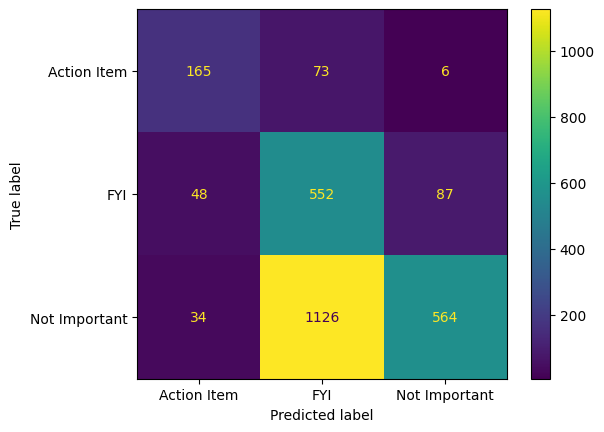

In [ ]:
y_true = df['category'].tolist()
y_pred = df['ckpt1_preds'].tolist()
report = classification_report(y_true, y_pred)
print(f"\n---CLASSIFICATION REPORT---\n{report}\n---CONFUSION MATRIX---\n")
cf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['Action Item', 'FYI', 'Not Important'])
disp.plot()

## Attempt 1 - Same technique as Ckpt1
Hierarchical models, only message as an input

In [ ]:
! pip install -q stormtrooper[setfit]

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.9 MB/s eta 0:00:00


In [ ]:
# Constants
TEST_SIZE = 500
RANDOM_STATE = 0

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from stormtrooper import SetFitFewShotClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
def map_category(category):
    if category in ['Action Items', 'FYI']:
        return 'Important'
    else:
        return 'Not Important'

In [ ]:
X = df["body"].values
y = df['category'].apply(map_category)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)
len(X_train), len(X_test)

(2155, 500)

In [ ]:
imp_ni_model = SetFitFewShotClassifier("sentence-transformers/all-MiniLM-L6-v2", device=device)
imp_ni_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


Generating Training Pairs:   0%|          | 0/20 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 86200
  Num epochs = 1
  Total optimization steps = 5388
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5388 [00:00<?, ?it/s]

SetFitFewShotClassifier(device='cuda')


 --- Classification Report ---

               precision    recall  f1-score   support

    Important       0.72      0.72      0.72       175
Not Important       0.85      0.85      0.85       325

     accuracy                           0.80       500
    macro avg       0.78      0.78      0.78       500
 weighted avg       0.80      0.80      0.80       500


 --- Confusion Matrix ---

[[126  49]
 [ 49 276]]


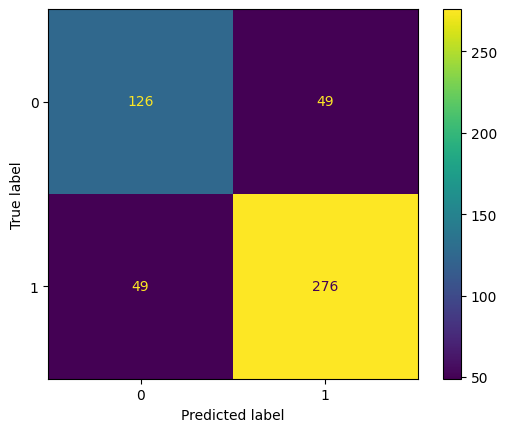

In [ ]:
few_shot_pred = imp_ni_model.predict(X_test)
report = classification_report(y_test, few_shot_pred)
print("\n --- Classification Report ---\n")
print(report)
cf_matrix = confusion_matrix(y_test, few_shot_pred)
print("\n --- Confusion Matrix ---\n")
print(cf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()

### 2nd stage classification

In [ ]:
df_sub = df[df['category']!='Not Important']
X = df_sub["body"].values
y = df_sub['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)
len(X_train), len(X_test)

(431, 500)

In [ ]:
ai_fyi_model = SetFitFewShotClassifier("sentence-transformers/all-MiniLM-L6-v2", device=device)
ai_fyi_model.fit(X_train, y_train)

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


Generating Training Pairs:   0%|          | 0/20 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 17240
  Num epochs = 1
  Total optimization steps = 1078
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1078 [00:00<?, ?it/s]

SetFitFewShotClassifier(device='cuda')


 --- Classification Report ---

              precision    recall  f1-score   support

Action Items       0.74      0.61      0.67       131
         FYI       0.87      0.92      0.90       369

    accuracy                           0.84       500
   macro avg       0.81      0.77      0.78       500
weighted avg       0.84      0.84      0.84       500


 --- Confusion Matrix ---

[[ 80  51]
 [ 28 341]]


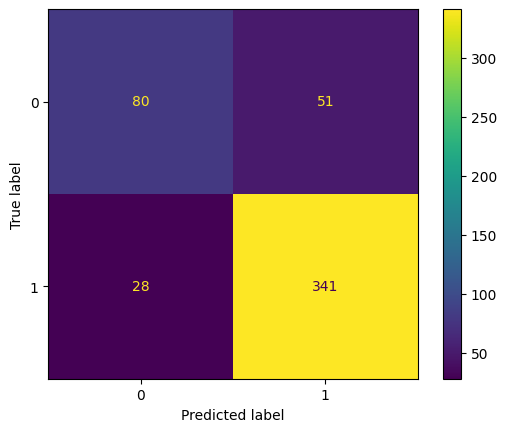

In [ ]:
few_shot_pred = ai_fyi_model.predict(X_test)
report = classification_report(y_test, few_shot_pred)
print("\n --- Classification Report ---\n")
print(report)
cf_matrix = confusion_matrix(y_test, few_shot_pred)
print("\n --- Confusion Matrix ---\n")
print(cf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()

### Ensemble

In [ ]:
def ensemble_predictor(message_body: str):
    pred1 = imp_ni_model.predict([message_body])[0]

    if pred1 != "Not Important":
        pred2 = ai_fyi_model.predict([message_body])[0]

        return pred2

    return pred1

In [ ]:
X = df["body"].values
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)
len(X_train), len(X_test)

(2155, 500)


 --- Classification Report ---

               precision    recall  f1-score   support

 Action Items       0.67      0.63      0.65        46
          FYI       0.67      0.88      0.76       129
Not Important       0.97      0.85      0.90       325

     accuracy                           0.84       500
    macro avg       0.77      0.79      0.77       500
 weighted avg       0.86      0.84      0.84       500


 --- Confusion Matrix ---

[[ 29  15   2]
 [  7 114   8]
 [  7  42 276]]


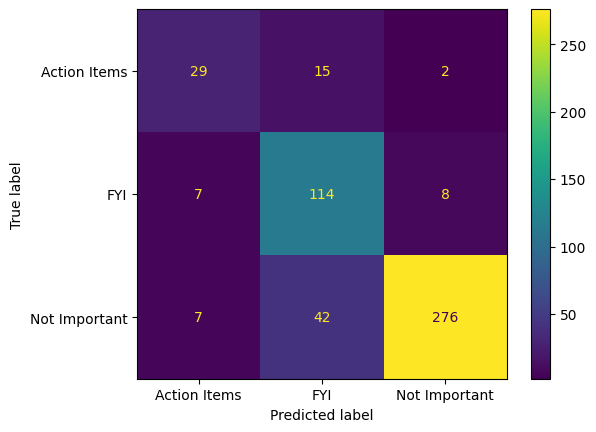

In [ ]:
preds = []
for body in X_test:
    preds.append(ensemble_predictor(body))

report = classification_report(y_test, preds)
print("\n --- Classification Report ---\n")
print(report)
cf_matrix = confusion_matrix(y_test, preds)
print("\n --- Confusion Matrix ---\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=["Action Items", "FYI", "Not Important"])
disp.plot()

### Export the model to CPU runnable

In [ ]:
imp_ni_model.model.model_body.to('cpu')
ai_fyi_model.model.model_body.to('cpu')
imp_ni_model.device = 'cpu'
ai_fyi_model.device = 'cpu'

In [ ]:
imp_ni_model.predict(['Are you ok?'])

array(['Not Important'], dtype='<U13')

In [ ]:
imp_ni_model.device

'cpu'

In [ ]:
import joblib
joblib.dump(imp_ni_model, '/content/drive/MyDrive/Data Science shortcuts/hierarchical_only_body_stage1_imp_ni_apr_17.model')
joblib.dump(ai_fyi_model, '/content/drive/MyDrive/Data Science shortcuts/hierarchical_only_body_stage2_ai_fyi_apr_17.model')

['/content/drive/MyDrive/Data Science shortcuts/hierarchical_only_body_stage2_ai_fyi_apr_17.model']

### testing exported models

In [ ]:
imp_ni_model_reloaded = joblib.load('/content/drive/MyDrive/Data Science shortcuts/hierarchical_only_body_stage1_imp_ni_apr_17.model')
ai_fyi_model_reloaded = joblib.load('/content/drive/MyDrive/Data Science shortcuts/hierarchical_only_body_stage2_ai_fyi_apr_17.model')

In [ ]:
def ensemble_predictor_reloaded(message_body: str):
    pred1 = imp_ni_model_reloaded.predict([message_body])[0]

    if pred1 != "Not Important":
        pred2 = ai_fyi_model_reloaded.predict([message_body])[0]

        return pred2

    return pred1

In [ ]:
ensemble_predictor_reloaded('Is our service ok?')

'Action Items'

In [ ]:
ensemble_predictor_reloaded('Meow Meow')

'Not Important'

## Attempt 2 - Tweak the classification threshold for better accuracy
Re-writing the code in the official setfit library for getting probabilities of prediction.

In [ ]:
! pip install -q datasets setfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from datasets import load_dataset, Dataset
from setfit import SetFitModel, TrainingArguments, Trainer, SetFitTrainer
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
TEST_SIZE = 500
SEED = 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load, dropNA, only select body & label, create Dataset
df = pd.read_csv("/content/drive/MyDrive/Data Science shortcuts/labelled_17_apr.csv")
df.dropna(subset=['category'], how='all', inplace=True) # these nan's are coming from skipped labelling messages
df = df[['body', 'category', 'channel_name', 'previous_messages', 'future_messages']]
df.head()

,body,category,channel_name,previous_messages,future_messages
0,<@U03RK8PCE22> Revamped Dashboard bugs,FYI,tech,['Wed 6:14PM -- 1. ~Rudhira World Webhook chan...,['Thu 1:02PM -- Nothing happening on click here']
1,"Or an idea is like this plugin, we can *turn a...",FYI,software-tools,"['Mon 1:21AM -- Really cool.', 'Mon 1:21AM -- ...",[]
2,7. Add a remove all filters (Text outline button),Action Items,tech,['Wed 2:54PM -- <@U03RK8PCE22> Is socket not g...,['Wed 2:59PM -- chetan i have sent you a link ...
3,We really need the new extension done before w...,Action Items,sales,['Thu 1:41AM -- Another big opportunity - smil...,['Thu 1:49AM -- They are mainly a shopify app ...
4,:mega: AWS CodePipeline Notification | ap-sout...,Not Important,deployments,['Sat 3:25PM -- :mega: AWS CodePipeline Notifi...,['Sun 10:25AM -- :mega: AWS CodePipeline Notif...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Stage 1 data preparation
df_stage1 = df.copy()
df_stage1['important'] = df_stage1['category'].apply(lambda x: 1 if x in ['FYI', 'Action Items'] else 0)
df_s1_train, df_s1_test = train_test_split(df_stage1, test_size=500, stratify=df_stage1['important'], random_state=0)
# df_s1_test = df_s1_test.drop(columns=['important'])

# Stage 2 data preparation
df_stage2 = df_s1_train[df_s1_train['category'].isin(['FYI', 'Action Items'])]
df_s2_train, df_s2_test = train_test_split(df_stage2, test_size=0.2, stratify=df_stage2['category'], random_state=0)
# df_s2_test = df_s2_test.drop(columns=['important'])

# Create the testing ensemble dataframe
# df_ens = df.copy()
# _,df_test = train_test_split(df_ens, test_size=500, stratify=df_ens['category'])

len(df_s1_train), len(df_s1_test), len(df_s2_train), len(df_s2_test)

(2155, 500, 604, 152)

<Axes: xlabel='category', ylabel='count'>

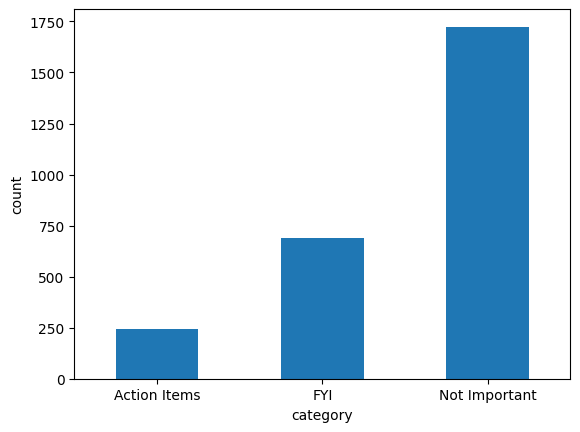

In [ ]:
df['category'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
# plt.show()

### Stage 1

In [ ]:
s1_ds = {
    'train': Dataset.from_pandas(df_s1_train, preserve_index=False),
    'test': Dataset.from_pandas(df_s1_test, preserve_index=False)
}

s1_model = SetFitModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2", labels=["Important", "Not Important"], device=DEVICE)
trainer = SetFitTrainer(model=s1_model, train_dataset=s1_ds['train'], column_mapping={'body': 'text', 'important': 'label'}, seed=0)
trainer.train()

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
<ipython-input-35-3cc84ab7cebc>:7: DeprecationWarning:

`SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.

Applying column mapping to the training dataset


Map:   0%|          | 0/2155 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 86200
  Batch size = 16
  Num epochs = 1
  Total optimization steps = 5388


Step,Training Loss


In [ ]:
import plotly.express as px

prob_preds = s1_model.predict_proba(s1_ds['test']['body'])[:,1]
true_labels = s1_ds['test']['important']

fpr, tpr, thresholds = roc_curve(true_labels, prob_preds)

# The histogram of scores compared to true labels
fig_hist = px.histogram(
    x=prob_preds, color=true_labels, nbins=50,
    labels=dict(color='True Labels', x='Score')
)

fig_hist.show()


# Evaluating model performance at various thresholds
df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}, index=thresholds)
df.index.name = "Thresholds"
df.columns.name = "Rate"

fig_thresh = px.line(
    df, title='TPR and FPR at every threshold',
    width=700, height=500
)

fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
fig_thresh.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       325
           1       0.73      0.83      0.78       175

    accuracy                           0.83       500
   macro avg       0.82      0.83      0.82       500
weighted avg       0.84      0.83      0.84       500


 --- CONFUSION MATRIX ---



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



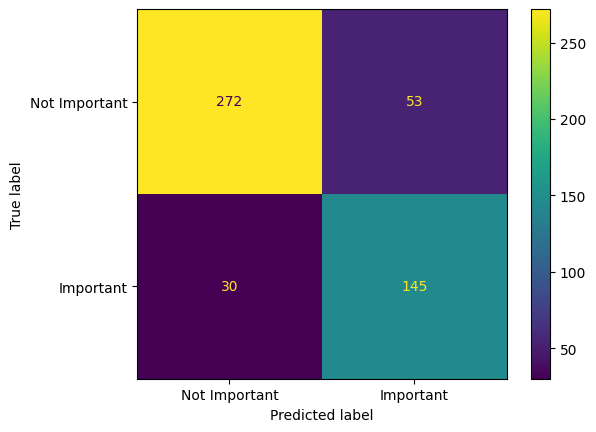

In [ ]:
threshold = 0.05  # default threshold
binary_preds = (prob_preds.numpy() >= threshold).astype(int)

report = classification_report(true_labels, binary_preds)

print(f"\n--- CLASSIFICATION REPORT ---\n{report}")
cf_matrix = confusion_matrix(true_labels, binary_preds)
print("\n --- CONFUSION MATRIX ---\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=["Not Important", "Important"])
disp.plot()

### Stage 2

In [ ]:
s2_ds = {
    'train': Dataset.from_pandas(df_s2_train, preserve_index=False),
    'test': Dataset.from_pandas(df_s2_test, preserve_index=False)
}

s2_model = SetFitModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2", labels=["Action Items", "FYI"], device=DEVICE)
trainer = SetFitTrainer(model=s2_model, train_dataset=s2_ds['train'], column_mapping={'body': 'text', 'category': 'label'}, seed=0)
trainer.train()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
<ipython-input-15-bde61bf6dcbd>:7: DeprecationWarning:

`SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.

Applying column mapping to the training dataset


Map:   0%|          | 0/604 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 24160
  Batch size = 16
  Num epochs = 1
  Total optimization steps = 1510


Step,Training Loss


In [ ]:
prob_preds = s2_model.predict_proba(s2_ds['test']['body'])[:,1]
true_labels = s2_ds['test']['category']
mapping = {'Action Items': 0, 'FYI': 1}
mapped_list = [mapping[item] for item in true_labels]

fpr, tpr, thresholds = roc_curve(mapped_list, prob_preds)

# The histogram of scores compared to true labels
fig_hist = px.histogram(
    x=prob_preds, color=mapped_list, nbins=50,
    labels=dict(color='True Labels', x='Score')
)

fig_hist.show()


# Evaluating model performance at various thresholds
df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}, index=thresholds)
df.index.name = "Thresholds"
df.columns.name = "Rate"

fig_thresh = px.line(
    df, title='TPR and FPR at every threshold',
    width=700, height=500
)

fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
fig_thresh.show()


--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.87      0.63      0.73        41
           1       0.88      0.96      0.92       111

    accuracy                           0.88       152
   macro avg       0.87      0.80      0.83       152
weighted avg       0.87      0.88      0.87       152


 --- CONFUSION MATRIX ---



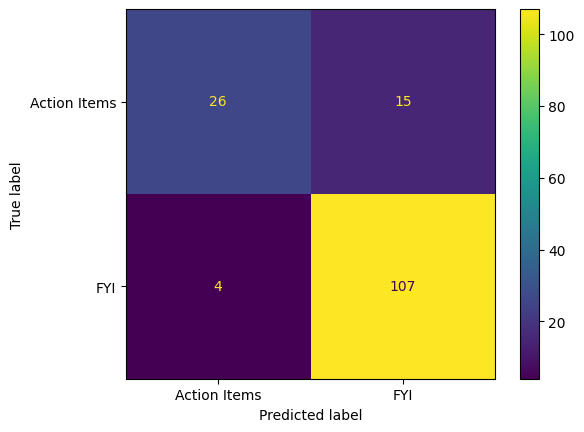

In [ ]:
threshold = 0.038  # default
binary_preds = (prob_preds.numpy() >= threshold).astype(int)
report = classification_report(mapped_list, binary_preds)

print(f"\n--- CLASSIFICATION REPORT ---\n{report}")
cf_matrix = confusion_matrix(mapped_list, binary_preds)
print("\n --- CONFUSION MATRIX ---\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=["Action Items", "FYI"])
disp.plot()

### Ensemble

In [ ]:
def ensemble_predictor(message_body):
    s1_imp_proba_pred = s1_model.predict_proba([message_body]).numpy()[0][1]
    if s1_imp_proba_pred >= 0.05: # 39 of 40 bins are considered Important
        s2_fyi_proba_pred = s2_model.predict_proba([message_body]).numpy()[0][1]

        if s2_fyi_proba_pred >= 0.038: # 32 of 40 bins are considered FYI
            return 'FYI'
        else:
            return 'Action Items'
    else:
        return 'Not Important'


--- CLASSIFICATION REPORT ---
               precision    recall  f1-score   support

 Action Items       0.57      0.54      0.55        39
          FYI       0.60      0.69      0.64       136
Not Important       0.88      0.83      0.85       325

     accuracy                           0.77       500
    macro avg       0.68      0.69      0.68       500
 weighted avg       0.78      0.77      0.77       500


 --- CONFUSION MATRIX ---



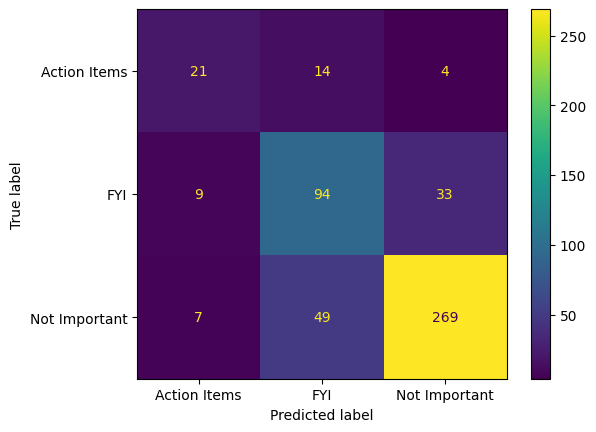

In [ ]:
y_pred = []
y_true = df_s1_test['category'].values

for i, row in df_s1_test.iterrows():
    y_pred.append(ensemble_predictor(row['body']))

report = classification_report(y_true, y_pred)

print(f"\n--- CLASSIFICATION REPORT ---\n{report}")
cf_matrix = confusion_matrix(y_true, y_pred)
print("\n --- CONFUSION MATRIX ---\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=["Action Items", "FYI", "Not Important"])
disp.plot()


--- CLASSIFICATION REPORT ---
               precision    recall  f1-score   support

          FYI       0.71      0.71      0.71         7
Not Important       0.98      0.98      0.98       120

     accuracy                           0.97       127
    macro avg       0.85      0.85      0.85       127
 weighted avg       0.97      0.97      0.97       127


 --- CONFUSION MATRIX ---



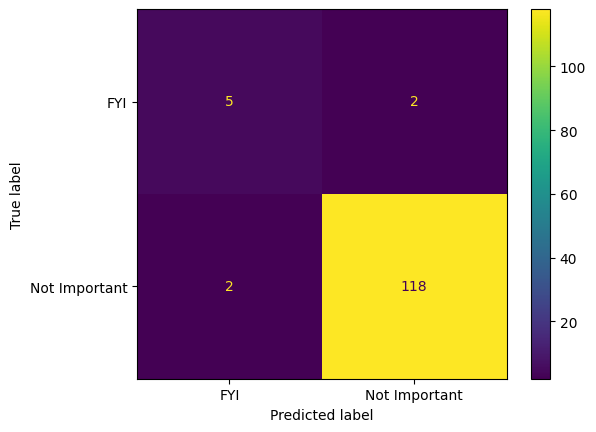

In [ ]:
eval_df_bot = df_s1_test[df_s1_test['channel_name'].isin(['deployments', 'form-publish-alerts',
                'form-generated-alerts', 'shortcut-updates',
                'demo-form-filled-alerts', 'sentry-errors', 'watchdog_engine',
                'aws-updates', 'ph-reviews', 'new-user-alerts', 'dc-sentry', 'dc-alerts'])]

y_pred = []
y_true = eval_df_bot['category'].values

for i, row in eval_df_bot.iterrows():
    y_pred.append(ensemble_predictor(row['body']))

report = classification_report(y_true, y_pred)

print(f"\n--- CLASSIFICATION REPORT ---\n{report}")
cf_matrix = confusion_matrix(y_true, y_pred)
print("\n --- CONFUSION MATRIX ---\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=["FYI", "Not Important"]) # there are no action items from bot messages in this df
disp.plot()
# eval_df_bot


--- CLASSIFICATION REPORT ---
               precision    recall  f1-score   support

 Action Items       0.92      0.80      0.86        45
          FYI       0.83      0.95      0.89       123
Not Important       0.97      0.92      0.94       205

     accuracy                           0.91       373
    macro avg       0.91      0.89      0.90       373
 weighted avg       0.92      0.91      0.91       373


 --- CONFUSION MATRIX ---



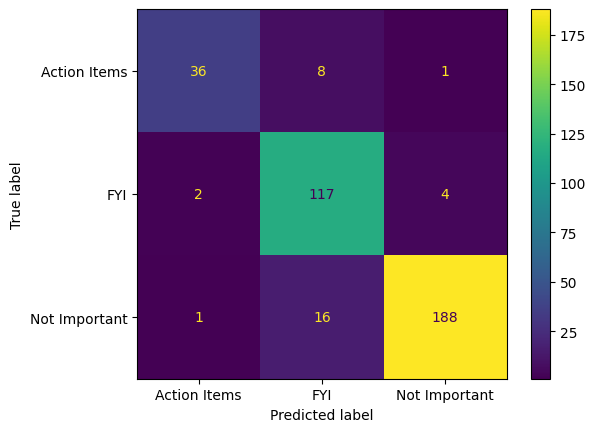

In [ ]:
eval_df_non_bot = df_s1_test[~df_s1_test['channel_name'].isin([ 'deployments', 'form-publish-alerts',
                        'form-generated-alerts',  'shortcut-updates',
                        'demo-form-filled-alerts',  'sentry-errors', 'watchdog_engine',
                        'aws-updates', 'ph-reviews', 'new-user-alerts',  'dc-sentry',  'dc-alerts'])]
y_pred = []
y_true = eval_df_non_bot['category'].values

for i, row in eval_df_non_bot.iterrows():
    y_pred.append(ensemble_predictor(row['body']))

report = classification_report(y_true, y_pred)

print(f"\n--- CLASSIFICATION REPORT ---\n{report}")
cf_matrix = confusion_matrix(y_true, y_pred)
print("\n --- CONFUSION MATRIX ---\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=["Action Items", "FYI", "Not Important"]) # there are no action items from bot messages in this df
disp.plot()

## 10 epochs

### Stage 1 (10 Epochs)

In [ ]:
from setfit import TrainingArguments, Trainer
s1_ds = {
    'train': Dataset.from_pandas(df_s1_train, preserve_index=False),
    'test': Dataset.from_pandas(df_s1_test, preserve_index=False)
}

s1_model = SetFitModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2", labels=["Important", "Not Important"], device=DEVICE)
args = TrainingArguments(
    sampling_strategy='undersampling',
    num_iterations=20,
    seed=0,
    num_epochs=2,
    use_amp=True,
    evaluation_strategy='steps',
    eval_steps=1_000 ,
    save_steps=1_000,
    save_total_limit=5,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=s1_model,
    args=args,
    train_dataset=s1_ds['train'],
    eval_dataset=s1_ds['test'],
    column_mapping={'body': 'text', 'important': 'label'}
)

trainer.train()

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset


Map:   0%|          | 0/2155 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 86200
  Batch size = 16
  Num epochs = 2
  Total optimization steps = 10776


Step,Training Loss,Validation Loss,Embedding Loss,Rate
500,No log,No log,0.189000,0.000009
1000,No log,No log,0.184900,0.000019
1500,No log,No log,0.195300,0.000019
2000,No log,No log,0.204100,0.000018
2500,No log,No log,0.222200,0.000017
3000,No log,No log,0.228800,0.000016
3500,No log,No log,0.214500,0.000015
4000,No log,No log,0.226200,0.000014
4500,No log,No log,0.237100,0.000013
5000,No log,No log,0.216300,0.000012


  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Loading best SentenceTransformer model from step 1000.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


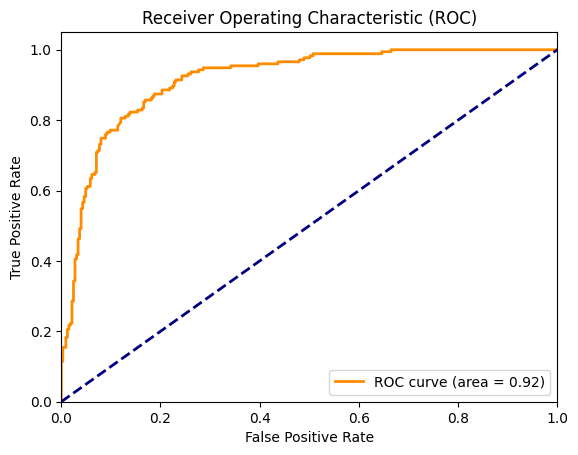

In [ ]:
prob_preds = s1_model.predict_proba(s1_ds['test']['body'])[:,1]
true_labels = s1_ds['test']['important']

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, prob_preds)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       325
           1       0.79      0.77      0.78       175

    accuracy                           0.85       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.85      0.85      0.85       500


 --- CONFUSION MATRIX ---



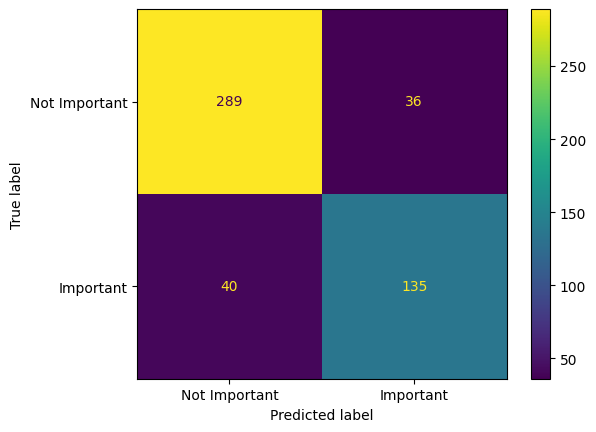

In [ ]:
threshold = 0.5  # default
binary_preds = (prob_preds.numpy() >= threshold).astype(int)
report = classification_report(true_labels, binary_preds)

print(f"\n--- CLASSIFICATION REPORT ---\n{report}")
cf_matrix = confusion_matrix(true_labels, binary_preds)
print("\n --- CONFUSION MATRIX ---\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=["Not Important", "Important"])
disp.plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


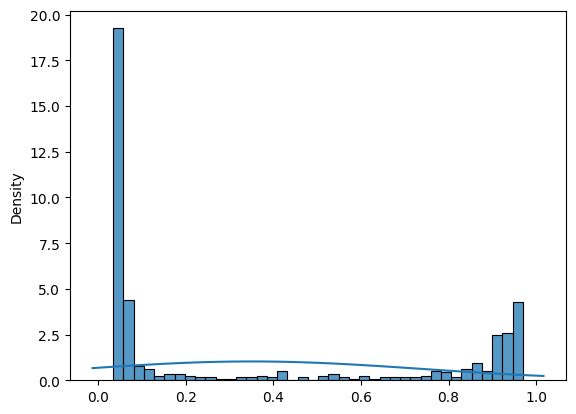

In [ ]:
import numpy as np
ax = sns.histplot(prob_preds, bins=40, stat='density')
mu, std = stats.norm.fit(prob_preds)
xx = np.linspace(*ax.get_xlim(),100)
ax.plot(xx, stats.norm.pdf(xx, mu, std));

### Stage 2

In [ ]:
s2_ds = {
    'train': Dataset.from_pandas(df_s2_train, preserve_index=False),
    'test': Dataset.from_pandas(df_s2_test, preserve_index=False)
}

s2_model = SetFitModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2", labels=["Action Items", "FYI"], device=DEVICE)
args = TrainingArguments(
    sampling_strategy='oversampling',
    num_iterations=20,
    seed=0,
    num_epochs=2,
    use_amp=True,
    evaluation_strategy='steps',
    eval_steps=1_000 ,
    save_steps=1_000,
    save_total_limit=5,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=s2_model,
    args=args,
    train_dataset=s2_ds['train'],
    eval_dataset=s2_ds['test'],
    column_mapping={'body': 'text', 'category': 'label'}
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset


Map:   0%|          | 0/744 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 29760
  Batch size = 16
  Num epochs = 2
  Total optimization steps = 3720


Step,Training Loss,Validation Loss,Embedding Loss,Rate
1000,No log,No log,0.198700,0.000016
2000,No log,No log,0.217500,0.000010
3000,No log,No log,0.225600,0.000004


  0%|          | 0/468 [00:00<?, ?it/s]

  0%|          | 0/468 [00:00<?, ?it/s]

  0%|          | 0/468 [00:00<?, ?it/s]

Loading best SentenceTransformer model from step 1000.


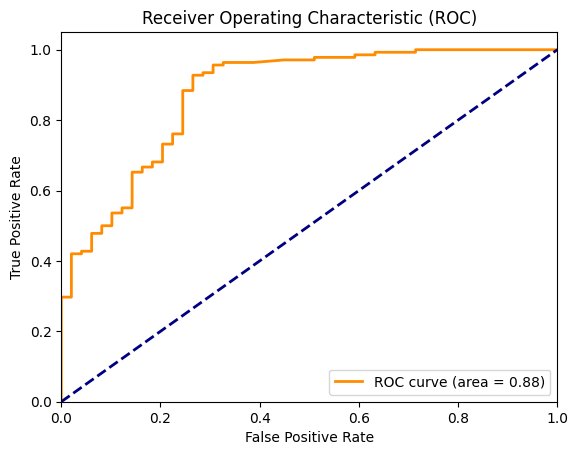

In [ ]:
prob_preds = s2_model.predict_proba(s2_ds['test']['body'])[:,1]
true_labels = s2_ds['test']['category']
mapping = {'Action Items': 0, 'FYI': 1}
mapped_list = [mapping[item] for item in true_labels]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(mapped_list, prob_preds)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        49
           1       0.90      0.93      0.92       138

    accuracy                           0.88       187
   macro avg       0.85      0.82      0.84       187
weighted avg       0.87      0.88      0.87       187


 --- CONFUSION MATRIX ---



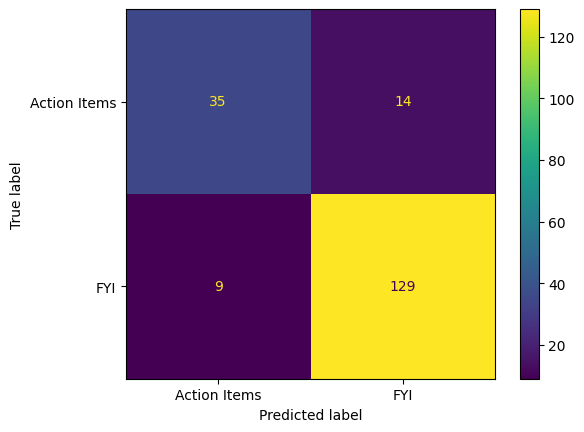

In [ ]:
threshold = 0.5  # default
binary_preds = (prob_preds.numpy() >= threshold).astype(int)
report = classification_report(mapped_list, binary_preds)

print(f"\n--- CLASSIFICATION REPORT ---\n{report}")
cf_matrix = confusion_matrix(mapped_list, binary_preds)
print("\n --- CONFUSION MATRIX ---\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=["Action Items", "FYI"])
disp.plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


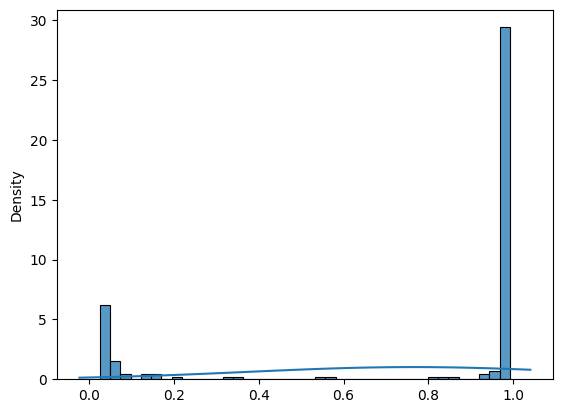

In [ ]:
ax = sns.histplot(prob_preds, bins=40, stat='density')
mu, std = stats.norm.fit(prob_preds)
xx = np.linspace(*ax.get_xlim(),100)
ax.plot(xx, stats.norm.pdf(xx, mu, std));

### Ensemble

In [ ]:
def ensemble_predictor(message_body):
    s1_imp_proba_pred = s1_model.predict_proba([message_body]).numpy()[0][1]
    if s1_imp_proba_pred >= 0.4: # 24 of 40 bins are considered Important
        s2_fyi_proba_pred = s2_model.predict_proba([message_body]).numpy()[0][1]

        if s2_fyi_proba_pred >= 0.2: # 32 of 40 bins are considered FYI
            return 'FYI'
        else:
            return 'Action Items'
    else:
        return 'Not Important'


--- CLASSIFICATION REPORT ---
               precision    recall  f1-score   support

 Action Items       0.91      0.85      0.88        46
          FYI       0.79      0.77      0.78       129
Not Important       0.91      0.92      0.91       325

     accuracy                           0.88       500
    macro avg       0.87      0.85      0.86       500
 weighted avg       0.88      0.88      0.88       500


 --- CONFUSION MATRIX ---



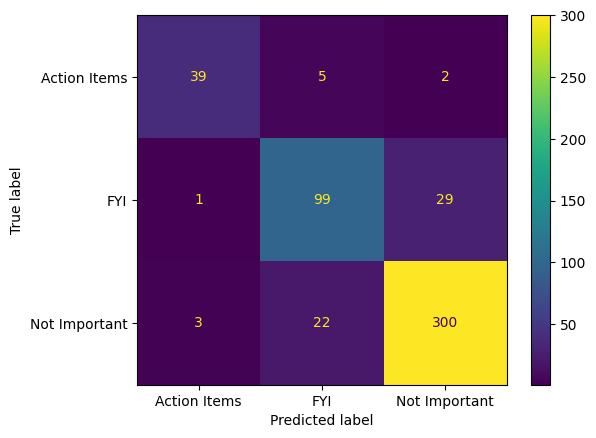

In [ ]:
y_pred = []
y_true = df_test['category'].values

for i, row in df_test.iterrows():
    y_pred.append(ensemble_predictor(row['body']))

report = classification_report(y_true, y_pred)

print(f"\n--- CLASSIFICATION REPORT ---\n{report}")
cf_matrix = confusion_matrix(y_true, y_pred)
print("\n --- CONFUSION MATRIX ---\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=["Action Items", "FYI", "Not Important"])
disp.plot()

# Garbage Collection (Do when needed)

In [ ]:
######## CAUTION
# doing this bcs of OOM error by CUDA
import gc
torch.cuda.empty_cache()
gc.collect()

6972173

# Deliverable Model with evaluation on data
- Model Date: 22 April 2024
- Data Date: 18 April 2024 (4.19pm)

In [ ]:
import joblib
s1_model = joblib.load("/content/drive/MyDrive/Data Science shortcuts/s1_model_22_apr_0.94.model")
s2_model = joblib.load("/content/drive/MyDrive/Data Science shortcuts/s2_model_22_apr_0.94.model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def ensemble_predictor(message_body):
    s1_imp_proba_pred = s1_model.predict_proba([message_body]).numpy()[0][1]
    if s1_imp_proba_pred >= 0.025: # 37 of 40 bins are considered Important
        s2_fyi_proba_pred = s2_model.predict_proba([message_body]).numpy()[0][1]

        if s2_fyi_proba_pred >= 0.3: # 32 of 40 bins are considered FYI
            return 'FYI', s1_imp_proba_pred, s2_fyi_proba_pred
        else:
            return 'Action Items', s1_imp_proba_pred, s2_fyi_proba_pred
    else:
        return 'Not Important', s1_imp_proba_pred, 0

## Evaluation

In [ ]:
import pandas as pd
eval_df = pd.read_csv('/content/drive/MyDrive/Data Science shortcuts/project-2-at-2024-04-18-10-49-60004c64.csv')
eval_df.dropna(subset=['category'], how='all', inplace=True) # these nan's are coming from skipped labelling messages
eval_df = eval_df[['body', 'category']]
eval_df.head()

,body,category
0,<@U03RK8PCE22> Revamped Dashboard bugs,FYI
1,"Or an idea is like this plugin, we can *turn a...",FYI
2,7. Add a remove all filters (Text outline button),Action Items
3,We really need the new extension done before w...,Action Items
4,:mega: AWS CodePipeline Notification | ap-sout...,Not Important


In [ ]:
from tqdm import tqdm

100%|██████████| 500/500 [00:32<00:00, 15.19it/s]


--- CLASSIFICATION REPORT ---
               precision    recall  f1-score   support

 Action Items       0.88      0.90      0.89        41
          FYI       0.88      0.89      0.88       134
Not Important       0.97      0.96      0.96       325

     accuracy                           0.93       500
    macro avg       0.91      0.92      0.91       500
 weighted avg       0.93      0.93      0.93       500


 --- CONFUSION MATRIX ---



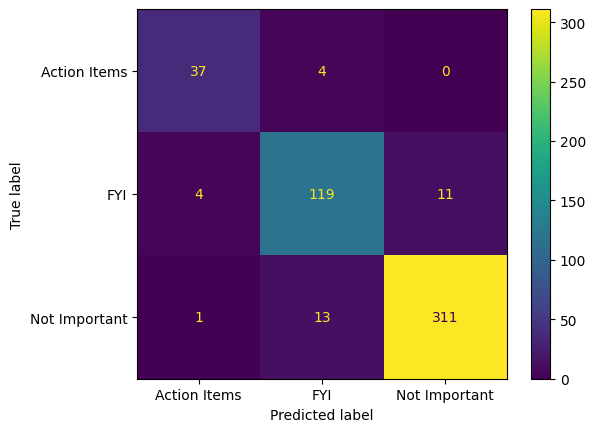

In [ ]:
y_pred = []
y_true = df_s1_test['category'].values

errarneous_preds = {'n_index': [],'message': [],'true_class': [], 'predicted_class': [], 'imp_prob': [], 'action_prob': []}

for i, row in tqdm(df_s1_test.iterrows(), total=len(df_s1_test)):
    prediction, s1_pred, s2_pred = ensemble_predictor(row['body'])
    y_pred.append(prediction)

    if prediction != row['category']:
        errarneous_preds['n_index'].append(i)
        errarneous_preds['message'].append(row['body'])
        errarneous_preds['true_class'].append(row['category'])
        errarneous_preds['predicted_class'].append(prediction)
        errarneous_preds['imp_prob'].append(s1_pred)
        errarneous_preds['action_prob'].append(1-s2_pred)

report = classification_report(y_true, y_pred)
print(f"\n--- CLASSIFICATION REPORT ---\n{report}")
cf_matrix = confusion_matrix(y_true, y_pred)
print("\n --- CONFUSION MATRIX ---\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=["Action Items", "FYI", "Not Important"])
disp.plot()

In [ ]:
err_df = pd.DataFrame(errarneous_preds)
err_df.head()

,message,true_class,predicted_class,imp_prob,action_prob
0,Features to be tested\n1. Revamped Dashboard\n...,Action Items,FYI,0.989272,0.007450
1,<@U04AKFHKULS>,Not Important,FYI,0.915473,0.007691
2,Guys we had disabled “powered by workhack” for...,Action Items,FYI,0.988091,0.509148
3,INFO: Form Published *form_id*\n65d492ec8f9936...,Not Important,FYI,0.025962,0.007759
4,Should be done by today,Action Items,FYI,0.986710,0.008386


In [ ]:
sub_err_df = err_df[(err_df['true_class'].isin(['Action Items', 'FYI'])) & (err_df['predicted_class'] == 'Not Important' )]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
original_df = pd.read_csv("/content/drive/MyDrive/Data Science shortcuts/labelled_17_apr.csv")
original_df.dropna(subset=['category'], how='all', inplace=True)

In [ ]:
sub_err_df.merge(original_df, left_on='message', right_on='body', how='left')

,message,true_class,predicted_class,imp_prob,action_prob,annotation_date,annotation_id,annotator,annotator_assigned,body,...,ckpt1_preds,created_at,formatted_timestamp,future_messages,id,lead_time,previous_messages,reactions,sender_details,updated_at
0,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.0,2024-04-08 00:00:00,1250,8,Mehul,:moneybag: $36 MRR,...,FYI,2024-04-11T15:37:57.075341Z,Fri 11:01PM,['Sat 4:49AM -- :money_with_wings: -$38 MRR'],10081,9.562,"['Fri 4:59AM -- :moneybag: $100 MRR', 'Fri 8:1...",[],"{""id"":""U05TS8U9N7M"",""team_id"":""T048WEGR6DB"",""n...",2024-04-11T15:37:57.075369Z
1,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.0,2024-04-08 00:00:00,170,1,Kartheek,:moneybag: $36 MRR,...,FYI,2024-04-09T08:27:49.155850Z,Thu 12:54AM,['Thu 2:35AM -- :moneybag: $38 MRR'],10667,5.862,"['Wed 7:12PM -- :moneybag: $27 MRR', 'Wed 8:54...",[],"{""id"":""U05TS8U9N7M"",""team_id"":""T048WEGR6DB"",""n...",2024-04-09T08:27:49.155889Z
2,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.0,2024-04-08 00:00:00,1690,2,Joy,:moneybag: $36 MRR,...,FYI,2024-04-12T11:33:53.504558Z,Thu 6:34PM,['Thu 10:43PM -- :moneybag: $26.60 MRR'],10685,4.580,['Wed 9:29PM -- The scale plan has totally cha...,[],"{""id"":""U05TS8U9N7M"",""team_id"":""T048WEGR6DB"",""n...",2024-04-12T11:33:53.504600Z
3,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.0,2024-04-09 00:00:00,329,1,Kartheek,:moneybag: $36 MRR,...,FYI,2024-04-09T11:24:12.702172Z,Tue 5:21AM,['Tue 6:44AM -- :moneybag: $36 MRR'],11506,6.004,"['Mon 4:53PM -- :moneybag: $26.60 MRR', 'Mon 1...",[],"{""id"":""U05TS8U9N7M"",""team_id"":""T048WEGR6DB"",""n...",2024-04-09T11:24:12.702206Z
4,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.0,2024-04-10 00:00:00,1965,4,YV,:moneybag: $36 MRR,...,FYI,2024-04-15T12:25:41.728326Z,Wed 7:37PM,['Wed 9:27PM -- :moneybag: $200 MRR'],11648,10.681,"['Wed 6:51AM -- :moneybag: $36 MRR', 'Wed 2:33...",[],"{""id"":""U05TS8U9N7M"",""team_id"":""T048WEGR6DB"",""n...",2024-04-15T12:25:41.728360Z
5,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.0,2024-04-10 00:00:00,1255,7,Khush,:moneybag: $36 MRR,...,FYI,2024-04-11T15:39:21.263891Z,Tue 6:44AM,['Tue 8:18AM -- :moneybag: $19 MRR'],12024,17.731,"['Mon 11:24PM -- :moneybag: $36 MRR', 'Tue 3:5...",[],"{""id"":""U05TS8U9N7M"",""team_id"":""T048WEGR6DB"",""n...",2024-04-11T15:39:21.263928Z
6,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.0,2024-04-10 00:00:00,923,1,Kartheek,:moneybag: $36 MRR,...,FYI,2024-04-11T04:37:07.395510Z,Thu 10:14PM,['Fri 2:36AM -- :moneybag: $50 MRR'],12183,7.381,"['Thu 1:47PM -- :moneybag: $36 MRR', 'Thu 6:45...",[],"{""id"":""U05TS8U9N7M"",""team_id"":""T048WEGR6DB"",""n...",2024-04-11T04:37:07.395536Z
7,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.0,2024-04-10 00:00:00,2044,4,YV,:moneybag: $36 MRR,...,FYI,2024-04-15T13:00:16.767181Z,Mon 4:24PM,['Mon 10:22PM -- :money_with_wings: -$50 MRR'],12198,3.043,"['Fri 11:34PM -- We can do this!!!', 'Fri 11:5...",[],"{""id"":""U05TS8U9N7M"",""team_id"":""T048WEGR6DB"",""n...",2024-04-15T13:00:16.767218Z
8,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.0,2024-04-11 00:00:00,1367,6,Joy,:moneybag: $36 MRR,...,FYI,2024-04-11T16:35:11.064758Z,Wed 6:51AM,['Wed 2:33PM -- :moneybag: $36 MRR'],12714,7.162,"['Wed 12:47AM -- :moneybag: $133 MRR', 'Wed 4:...",[],"{""id"":""U05TS8U9N7M"",""team_id"":""T048WEGR6DB"",""n...",2024-04-11T16:35:11.064785Z
9,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.0,2024-04-11 00:00:00,1026,1,Kartheek,:moneybag: $36 MRR,...,FYI,2024-04-11T05:20:58.762065Z,Mon 4:45PM,['Mon 8:08PM -- :money_with_wings: -$26.60 MRR'],12798,6.289,"['Sun 2:02AM -- :moneybag: $0.02 MRR', 'Sun 4:...",[],"{""id"":""U05TS8U9N7M"",""team_id"":""T048WEGR6DB"",""n...",2024-04-11T05:20:58.762091Z


In [ ]:
err_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,message,true_class,predicted_class,imp_prob,action_prob
0,Features to be tested\n1. Revamped Dashboard\n...,Action Items,FYI,0.989272,0.007450
1,<@U04AKFHKULS>,Not Important,FYI,0.915473,0.007691
2,Guys we had disabled “powered by workhack” for...,Action Items,FYI,0.988091,0.509148
3,INFO: Form Published *form_id*\n65d492ec8f9936...,Not Important,FYI,0.025962,0.007759
4,Should be done by today,Action Items,FYI,0.986710,0.008386
5,:moneybag: $36 MRR,FYI,Not Important,0.022230,1.000000
6,Hey everyone :wave::skin-tone-3:\n\nOur intera...,Not Important,FYI,0.989659,0.015863
7,<https://app.amplitude.com/analytics/workhack/...,Not Important,FYI,0.988810,0.007708
8,:moneybag: $38 MRR,Not Important,FYI,0.169640,0.008006
9,Do we have standup today <@U048SQRPG6S>?,Not Important,Action Items,0.988482,0.975551


# Bots vs non-bot

In [ ]:
original_df['channel_name'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array(['tech', 'software-tools', 'sales', 'deployments', 'eng',
       'form-publish-alerts', '01_resources-n-discussion',
       'form-generated-alerts', 'content-updates', 'to-do',
       'shortcut-updates', 'machine-learning', 'general', 'tech-standup',
       'data-collection-eng', 'be-testing', 'demo-form-filled-alerts',
       'on-call', 'bugs', 'chartmogul', 'engineering', 'new-user-alerts',
       'standup', 'signups', 'data-collection-service-notification',
       'research', 'grader-alerts', 'frontend',
       'beta-product-development', 'support', 'ideas', 'product',
       'team_hype', 'founders-office', 'dc-sentry', 'marketing',
       'sentry-errors', 'watchdog_engine', 'cohort-26',
       '05_resume-review', 'feedback', 'multi_national_cohort26',
       '06_interview-prep', 'assesshub', 'random', 'cohort-24',
       'public-channel-1', 'git', '04_weekly-product-activity', 'design',
       'github-findr', '02_ask-for-help', 'just_for_fun', 'announcements',
       'enginee

In [ ]:
bot_channels = ['deployments', 'form-publish-alerts',
                'form-generated-alerts', 'shortcut-updates',
                'demo-form-filled-alerts', 'sentry-errors', 'watchdog_engine',
                'aws-updates', 'ph-reviews', 'new-user-alerts', 'dc-sentry', 'dc-alerts']

In [1]:
import numpy as np
np.array([1, 2])

array([1, 2])